In [1]:
import cv2
import numpy as np
import math
import io
from IPython.display import Image, display

In [2]:
def openImage():
    return cv2.imread("../images/nestle.jpeg")

def displayImage(img, fmt='.jpeg'):
    display(Image(cv2.imencode(fmt, img)[1].tostring()))

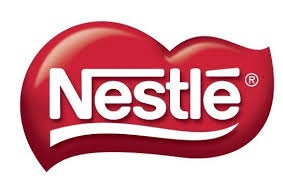

In [3]:
displayImage(openImage())

In [4]:
image = openImage()

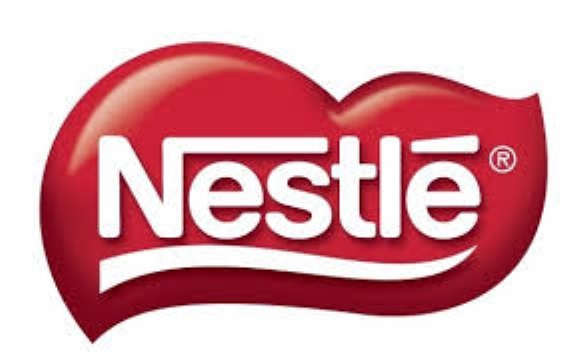

In [5]:
def scale_row(image, scale=2):
    return np.moveaxis(np.asarray([
        np.vstack([
                np.linspace(image[i,:,channel], image[i+1,:,channel], 2 + scale - 1)[:-1,:]
                for i in range(image[...,channel].shape[0] - 1)])
        for channel in range(image.shape[2])
    ]), 0, -1)

def scale_image_k_points(image, scale=2):
    return np.clip(scale_row(scale_row(image).swapaxes(0,1)).swapaxes(0,1), 0, 255).astype(np.uint8)

displayImage(scale_image_k_points(openImage()))

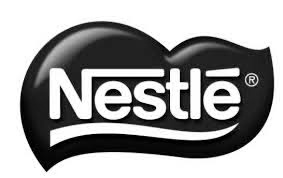

In [31]:
l=openImage()[:,:,1]
displayImage(l)

### *A followup challenge: Instead of scaling the entire image, just take a pivot point, enlarge from that and keep the original image size same. (view port scaling)*

In [34]:
l[1,...].shape

(283,)

In [52]:
l=openImage()
v1=l[100,:,0]
print(v1.shape)
v2=l[101,:,0]
print(v2.shape)
displayImage(np.linspace(v1,v2,20))

(283,)
(283,)


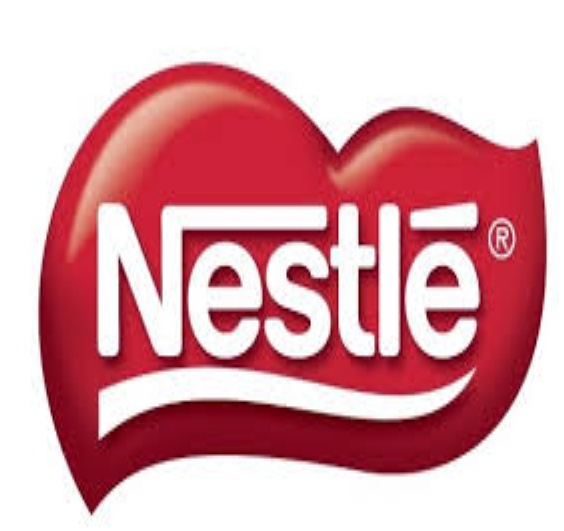

In [82]:

def scale_image(arr,scale=2):
    sarr=None
    for i in range(arr.shape[0]-1):
        int_arr=np.linspace(arr[i,:],arr[i+1,:],scale+1)[:-1,:]
        if sarr is None:
            sarr=int_arr
        else:
            sarr=np.vstack((sarr,int_arr))
    return sarr
arr=l[:,:,:]

v=np.rot90(scale_image(arr,3))
final_image=scale_image(v)
displayImage(np.rot90(final_image,-1))

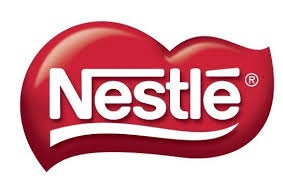

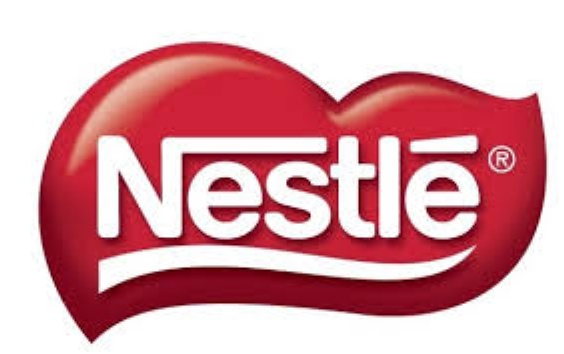

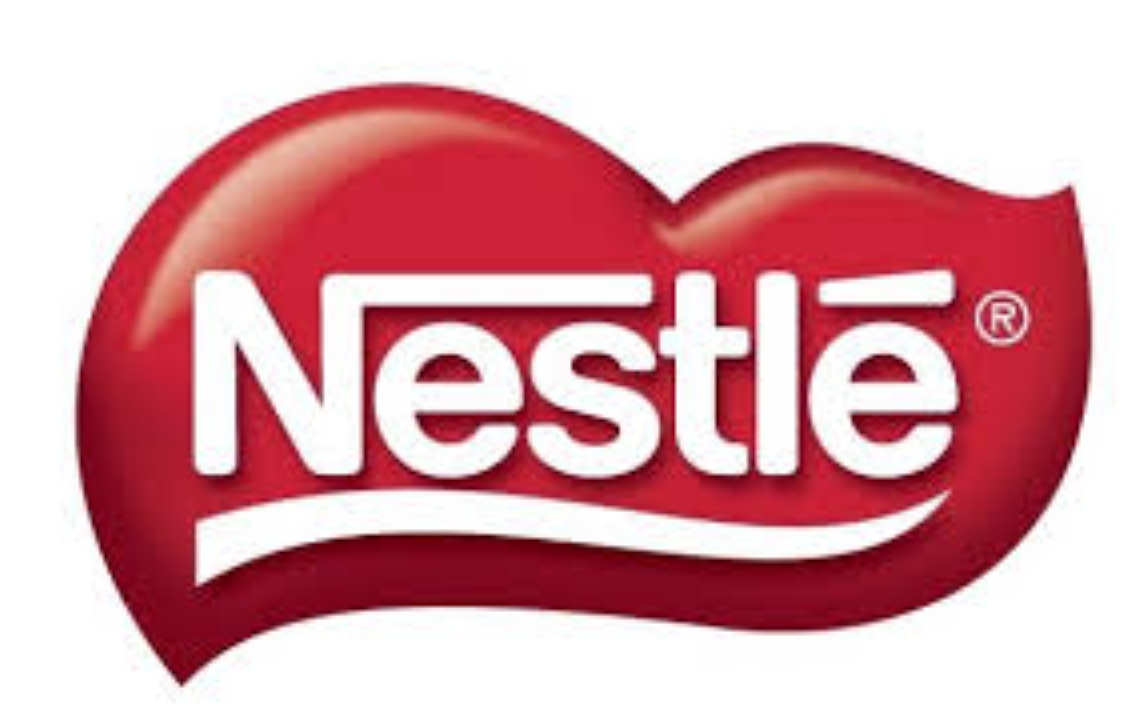

In [92]:
def scale_Channel(arr,scale=2):
    newarr=None
    for i in range(arr.shape[0]-1):
        int_arr=np.linspace(arr[i,:],arr[i+1,:],(scale+1))[:-1,:]
        if newarr is None:
            newarr=int_arr
        else:
            newarr=np.vstack((newarr,int_arr))
    return newarr

displayImage(l)
z=scale_Channel(l)
v=np.rot90(z)
m=scale_Channel(v)
displayImage(np.rot90(m,3))
s=scale_Channel(m)
w=np.rot90(s,3)
v=scale_Channel(w)
displayImage(v)
